In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [2]:
data = pd.read_csv('arxiv_papers.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,Laboratory rotational spectra of cyanocyclohex...,Chirped-pulse Fourier transform microwave (CP-...,"['Gabi Wenzel', 'Martin S. Holdren', 'D. Archi...",11.0,31.0,5.0,arxiv.org/pdf/2504.13686,Astrophysics of Galaxies,['Chemical Physics'],NaN,NaN,[],2025-04-21
5126,Deriving the Energy Function of Non-repeaters ...,Fast radio bursts (FRBs) are radio pulses that...,"['Wenqi Ma', 'Zhifu Gao', 'Biaopeng Li', 'Jume...",5.0,11.0,1.0,arxiv.org/pdf/2504.13705,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['Extragalactic radio sources (508) — Neutron ...,2025-04-21
5127,Molecular Clouds at the Edge of the Galaxy I. ...,The Galactic edge at Galactocentric distances ...,"['C.S.Luo', 'X.D.Tang', 'C.Henkel', 'K.M.Mente...",10.0,15.0,3.0,arxiv.org/pdf/2504.13732,Astrophysics of Galaxies,NaN,NaN,NaN,['stars: formation – ISM: clouds – ISM: molecu...,2025-04-21
5128,"The impact of new ($α$, n) reaction rates on t...",Massive stars are significant sites for the we...,"['Wenyu Xin', 'Chun-Ming Yip', ""Ken'ichi Nomot...",15.0,16.0,4.0,arxiv.org/pdf/2504.13766,Solar and Stellar Astrophysics,"['Nuclear Experiment', 'Nuclear Theory']",NaN,NaN,"['massive stars', 'metal-poor stars', 'nuclear...",2025-04-21


In [4]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 67 times.
The second most repeated author is 'S. Bardelli' and they were repeated 55 times.


In [5]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 1396 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 1061 times.


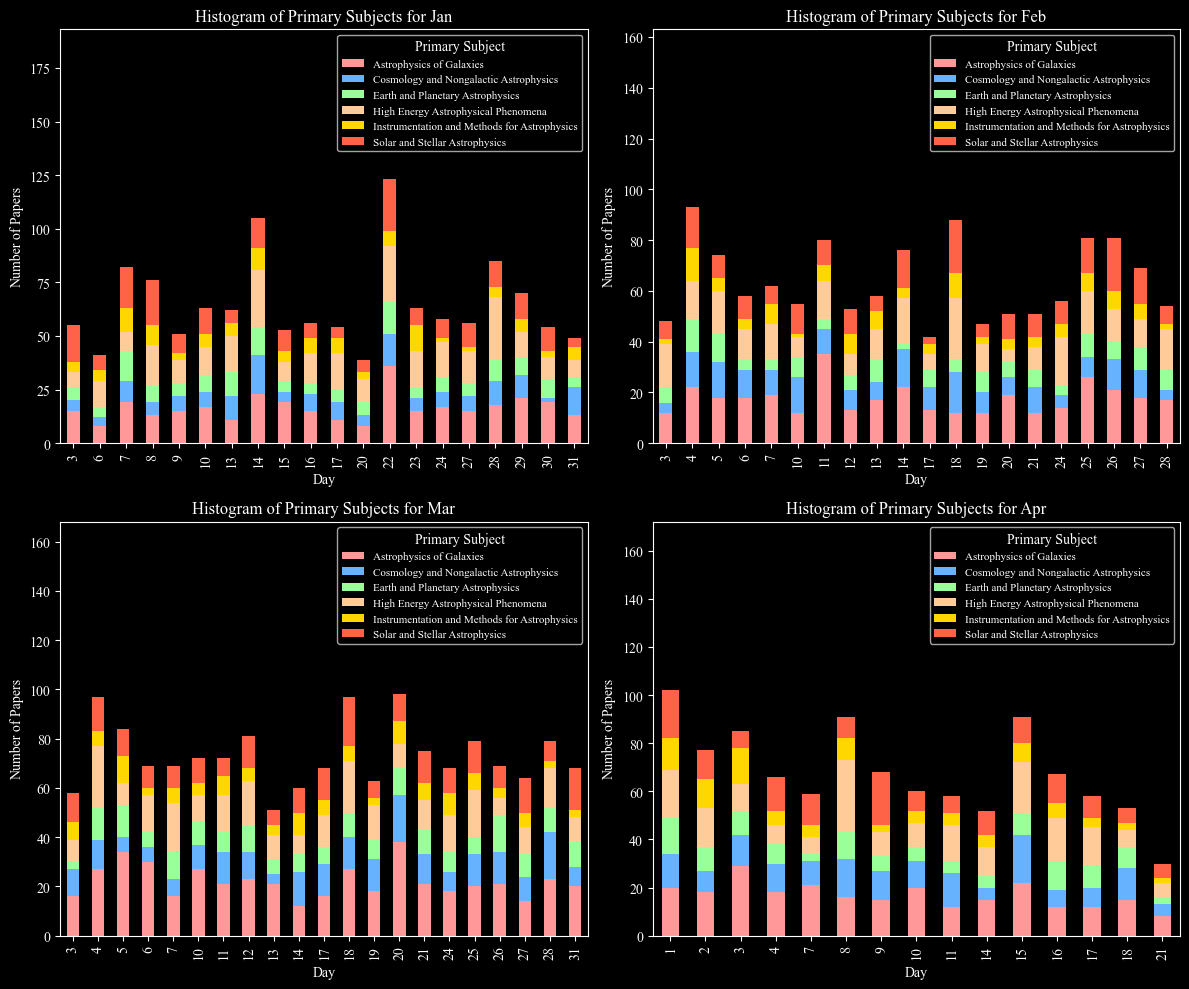

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


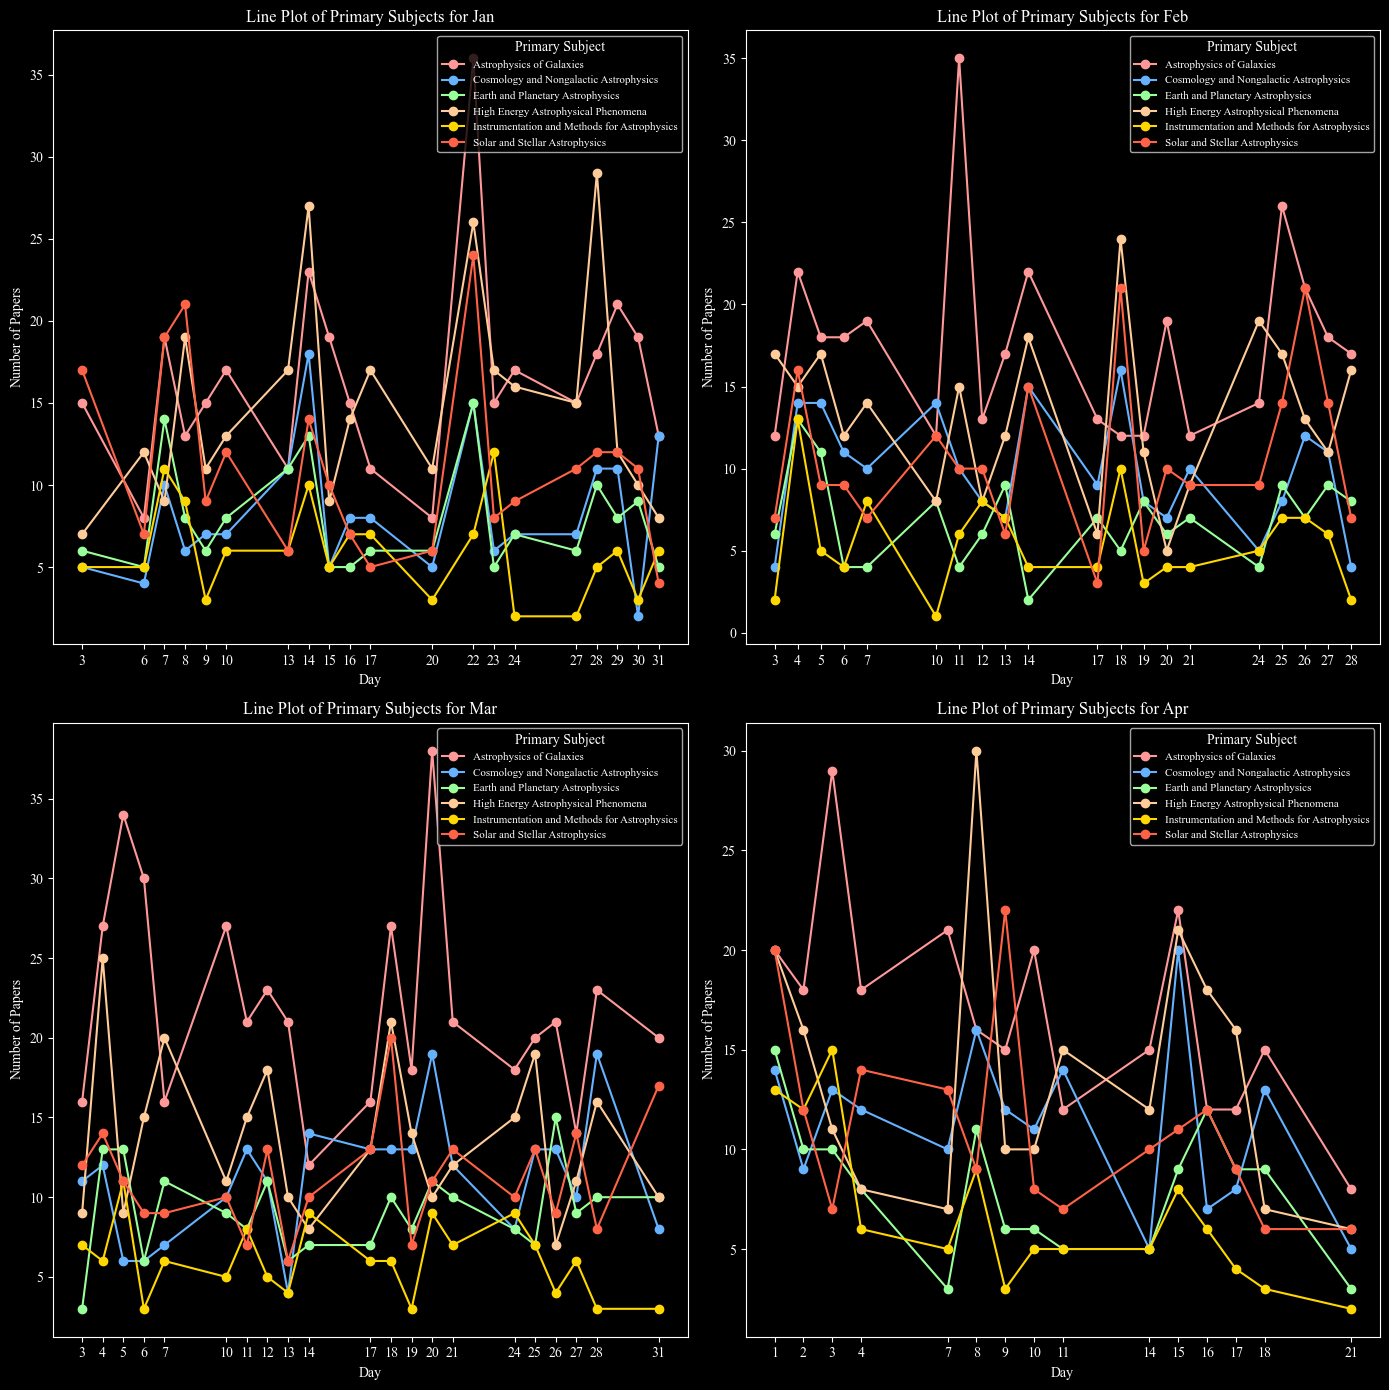

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

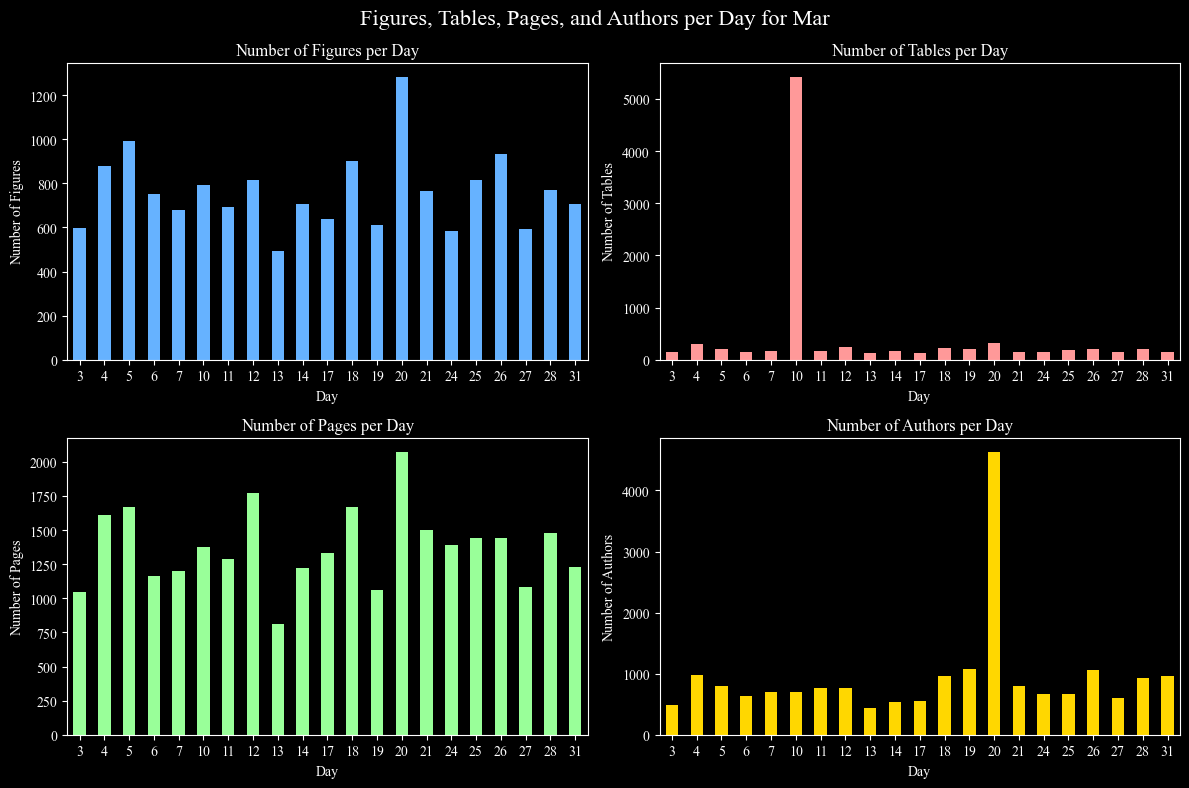

In [8]:

i = 2 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


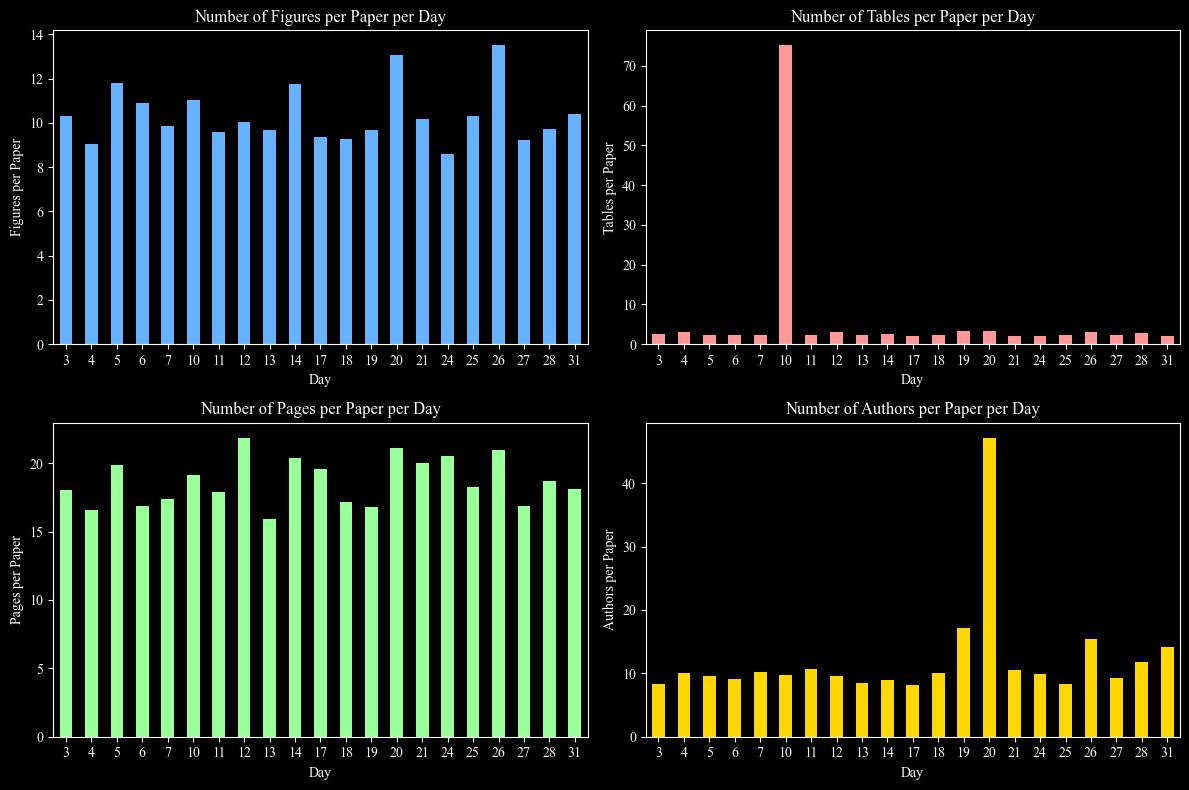

In [9]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


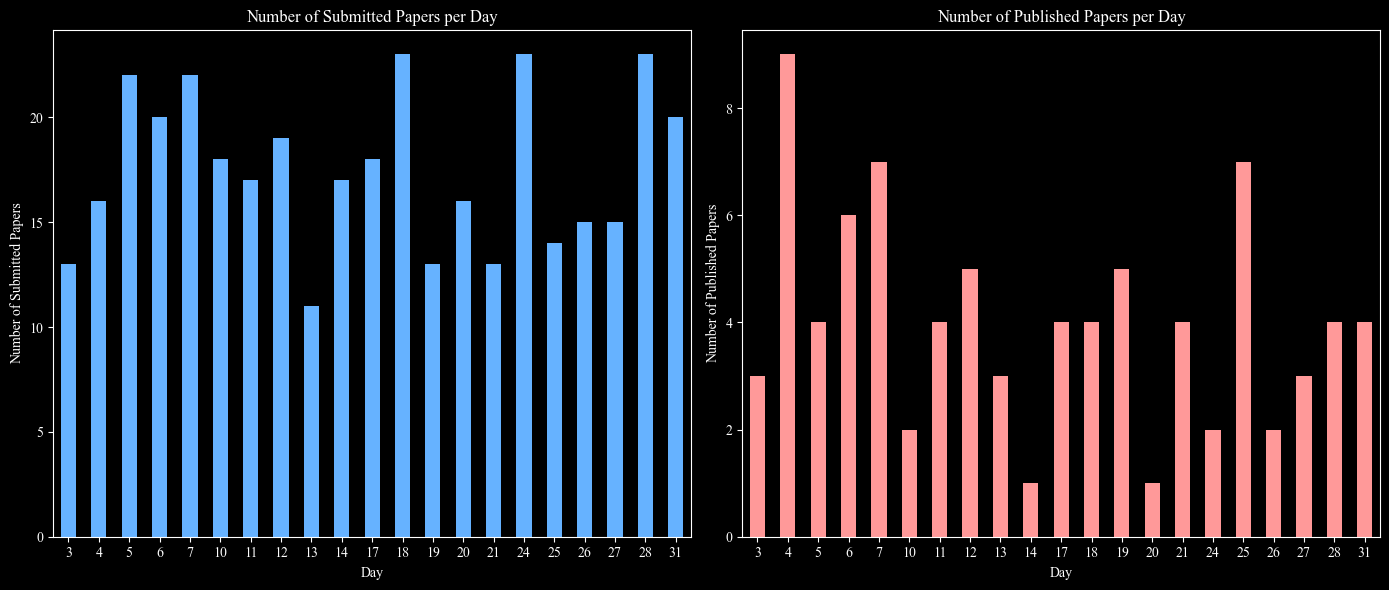

In [10]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [11]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is [] and it was repeated 1449 times.
The second most repeated keyword is 'accretion'] and it was repeated 27 times.


In [12]:
# Find the author papers
author = 'J. Carretero'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
70,Photometry of outer Solar System objects from ...,For the 696 trans-Neptunian objects (TNOs) wit...,"['Pedro H. Bernardinelli', 'Gary M. Bernstein'...",13.0,52.0,4.0,arxiv.org/pdf/2501.01551,Earth and Planetary Astrophysics,['Instrumentation and Methods for Astrophysics...,NaN,NaN,[],2025-01-06,6,Jan
337,Euclid: Detecting Solar System objects in Eucl...,The ESA Euclid mission will survey more than 1...,"['A. A. Nucita', 'L. Conversi', 'A. Verdier', ...",11.0,15.0,2.0,arxiv.org/pdf/2501.05023,Instrumentation and Methods for Astrophysics,NaN,NaN,NaN,"['minor planets', 'asteroids: general – Planet...",2025-01-10,10,Jan
390,Dark Energy Survey Year 6 Results: Cell-based ...,We present the Metadetection weak lensing gala...,"['M. Yamamoto', 'M. R. Becker', 'E. Sheldon', ...",22.0,30.0,7.0,arxiv.org/pdf/2501.05665,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,['gravitational lensing: weak – cosmology: obs...,2025-01-13,13,Jan
392,Dark Energy Survey Year 6 Results: Synthetic-s...,"Synthetic source injection (SSI), the insertio...","['D. Anbajagane', 'M. Tabbutt', 'J. Beas-Gonza...",18.0,29.0,2.0,arxiv.org/pdf/2501.05683,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,NaN,['sky surveys - astronomical simulations - cos...,2025-01-13,13,Jan
397,Dark Energy Survey Year 3 Results: Photometric...,We describe the photometric data set assembled...,"['K. Bechtol', 'I. Sevilla-Noarbe', 'A. Drlica...",21.0,27.0,7.0,arxiv.org/pdf/2501.05739,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Surveys – Observational cosmology – Dark ene...,2025-01-13,13,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,Euclid Quick Data Release (Q1). The Euclid vie...,We search for galaxy protoclusters at redshift...,"['Euclid Collaboration', 'T. Dusserre', 'H. Do...",11.0,18.0,4.0,arxiv.org/pdf/2503.21304,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],A&A,NaN,['Methods: statistical – Surveys – Cosmology: ...,2025-03-28,28,Mar
4094,Euclid Quick Data Release (Q1): A photometric ...,We present a catalogue of more than 5000 new u...,"['M. Žerjal', 'C. Dominguez-Tagle', 'N. Sedigh...",14.0,17.0,7.0,arxiv.org/pdf/2503.22497,Solar and Stellar Astrophysics,"['Earth and Planetary Astrophysics', 'Astrophy...",NaN,NaN,['Stars: brown dwarfs – Catalogues – Stars: lo...,2025-03-31,31,Mar
4101,Euclid Quick Data Release (Q1) Ultracool dwarf...,Ultracool dwarfs (UCDs) encompass the lowest m...,"['A. Mohandasan', 'R. L. Smart', 'C. Reylé', '...",9.0,14.0,2.0,arxiv.org/pdf/2503.22559,Solar and Stellar Astrophysics,"['Earth and Planetary Astrophysics', 'Astrophy...",NaN,NaN,['spectroscopic ⋆This paper is published on be...,2025-03-31,31,Mar
4575,Probing gravity with non-linear clustering in ...,We present the first computation of the gravit...,"['C. Viglione', 'P. Fosalba', 'I. Tutusaus', '...",12.0,44.0,3.0,arxiv.org/pdf/2504.04961,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Cosmology: theory – large-scale structure of...,2025-04-08,8,Apr
